# Distribution Plots

Let's discuss some plots that allow us to visualize the distribution of a data set. These plots are:

* histplot
* rugplot
* kdeplot
* jointplot
* pairplot

___
## Imports

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data
Seaborn comes with built-in data sets!

In [3]:
tips = sns.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## histplot

The histplot shows the distribution of a univariate set of observations.

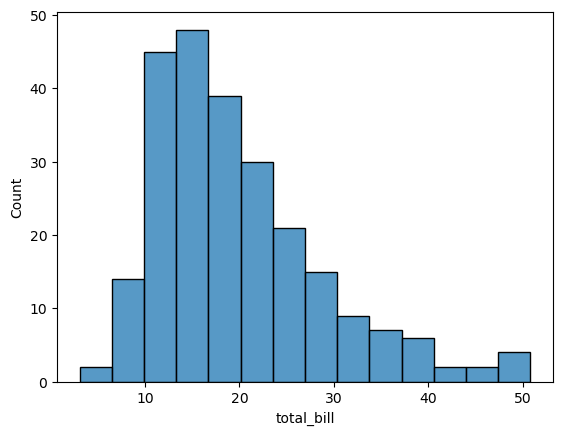

In [5]:
sns.histplot(data=tips, x='total_bill')
plt.show()
# Safe to ignore warnings

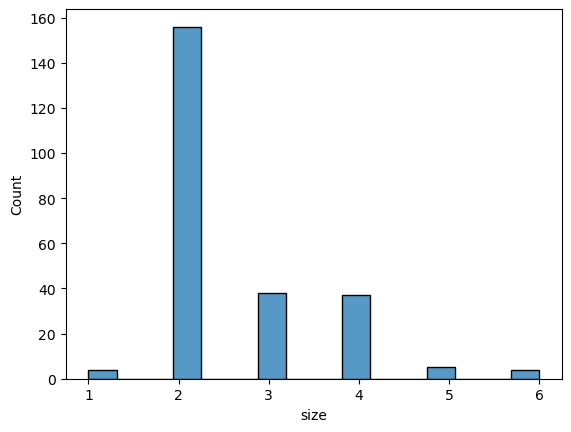

In [7]:
sns.histplot(data = tips, x = 'size')
plt.show()

To remove the kde layer and just have the histogram use:

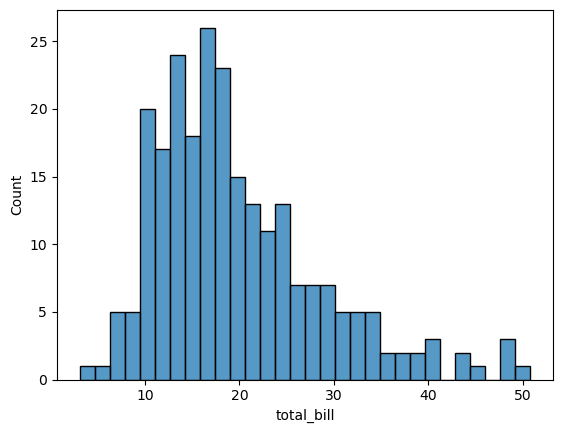

In [24]:
sns.histplot(data=tips, x='total_bill', kde=False, bins=30)
plt.show()

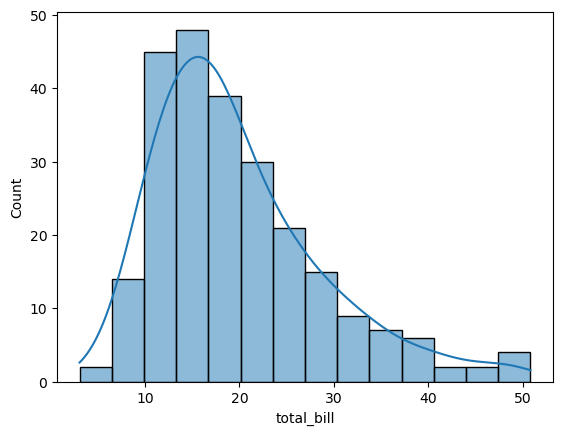

In [9]:
sns.histplot(data = tips, x = 'total_bill', kde = True) 
plt.show()

## rugplot

rugplots are actually a very simple concept, they just draw a dash mark for every point on a univariate distribution. They are the building block of a KDE plot:

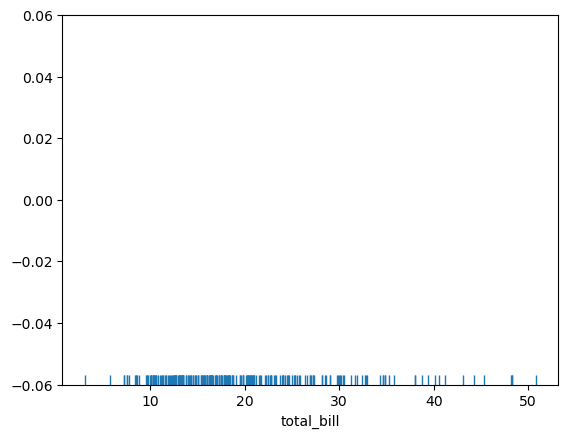

In [10]:
sns.rugplot(tips['total_bill'])
plt.show()

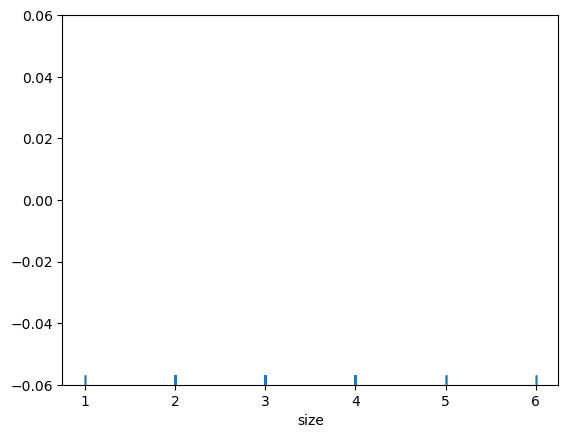

In [11]:
sns.rugplot(data = tips, x = 'size')
plt.show()

## kdeplot

kdeplots are [Kernel Density Estimation plots](http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth). These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value. For example:

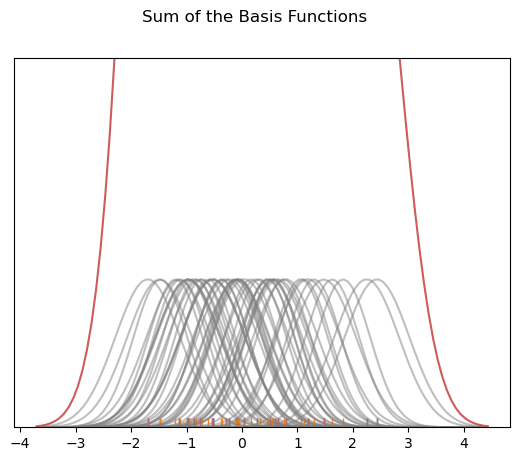

In [36]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)
plt.show()

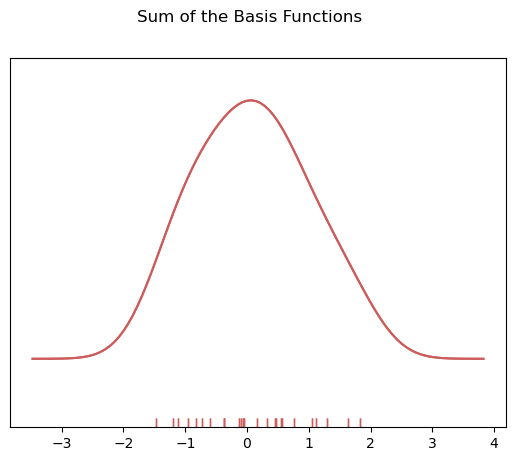

In [38]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")
plt.show()

So with our tips dataset:

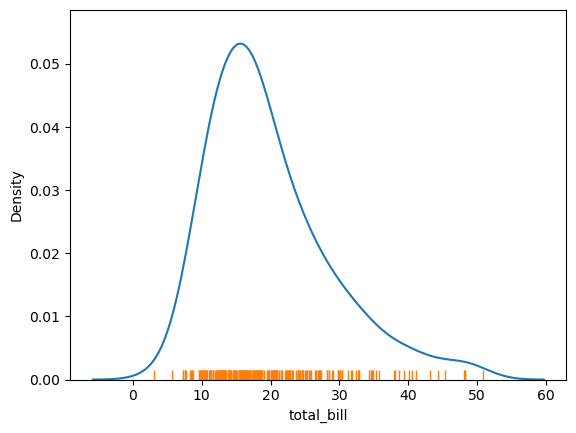

In [39]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])
plt.show()

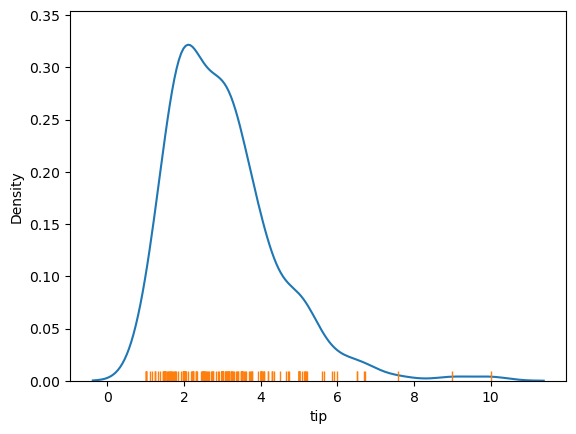

In [40]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])
plt.show()

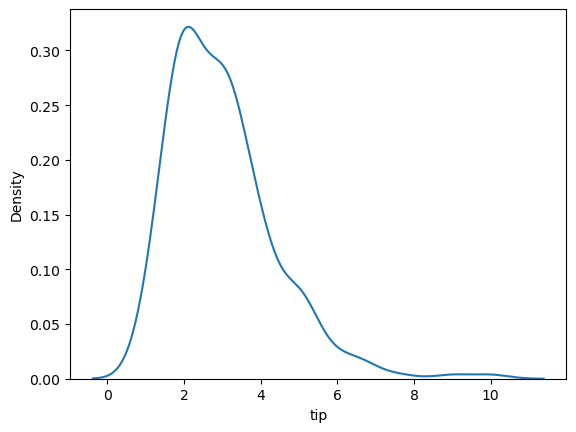

In [16]:
sns.kdeplot(data = tips, x = 'tip')
plt.show()

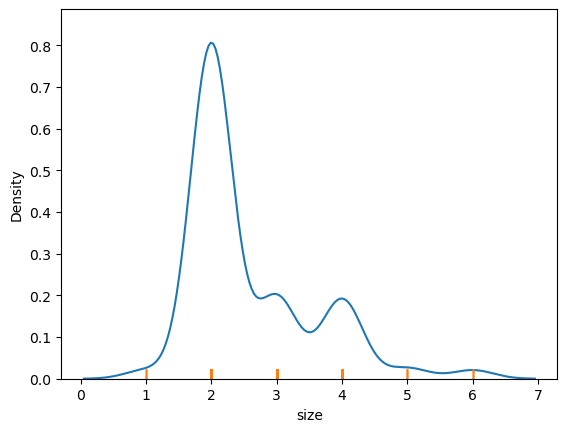

In [15]:
sns.kdeplot(data = tips, x = 'size')
sns.rugplot(data = tips, x = 'size')
plt.show()

## jointplot

jointplot() allows you to basically match up two distplots for bivariate data. With your choice of what **kind** parameter to compare with: 
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

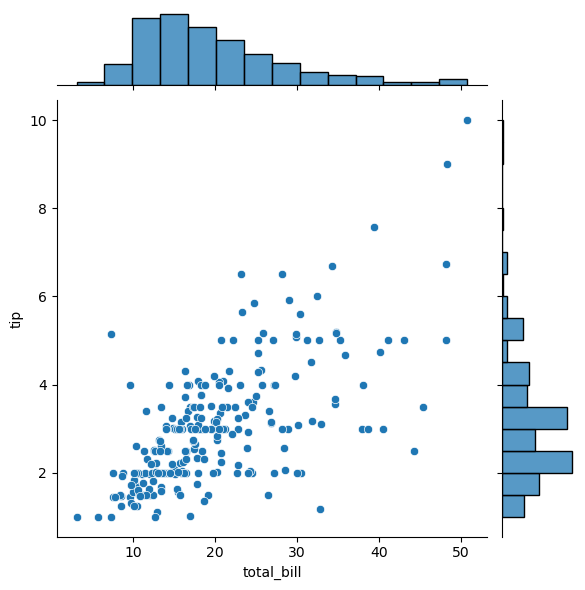

In [27]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')
plt.show()

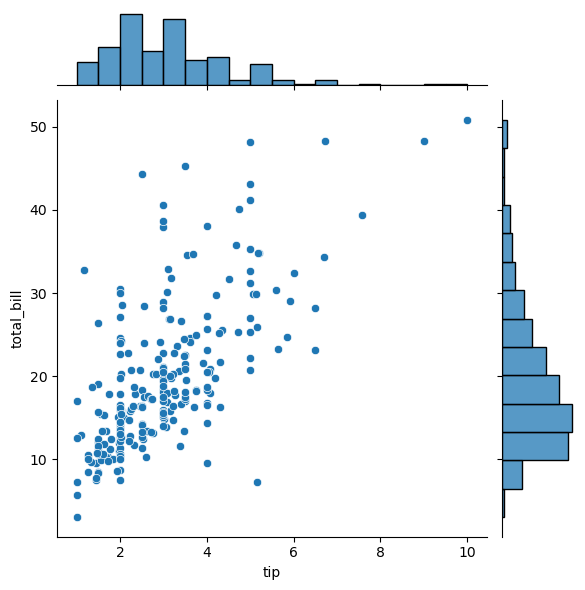

In [17]:
sns.jointplot(data = tips, x = 'tip', y = 'total_bill', kind = 'scatter')
plt.show()

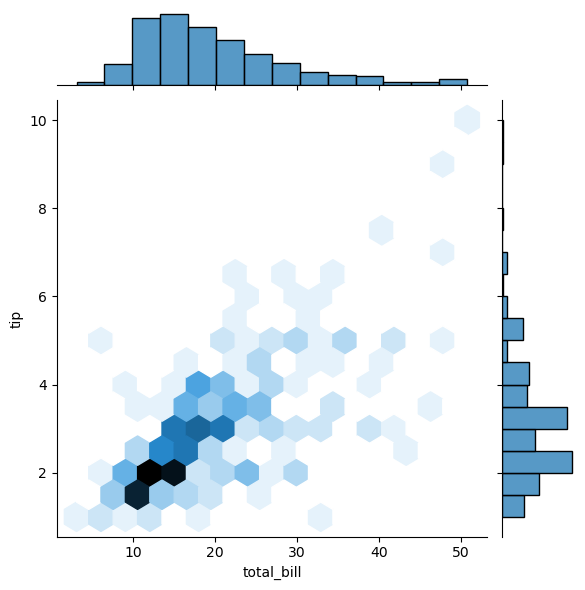

In [28]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')
plt.show()

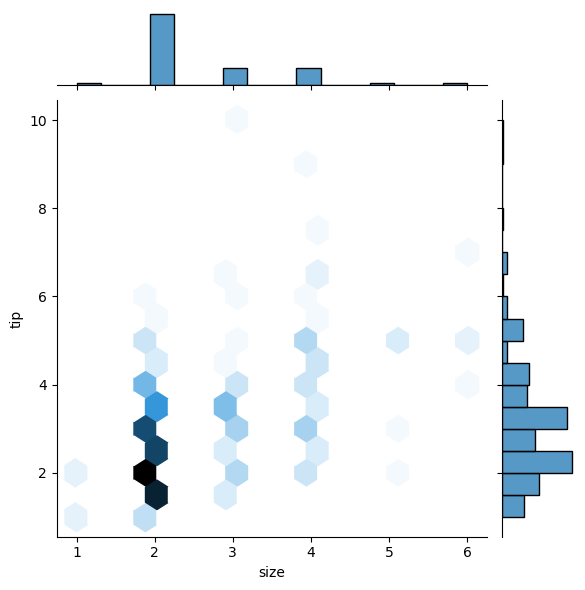

In [23]:
sns.jointplot(data = tips, x = 'size', y = 'tip', kind = 'hex')
plt.show()

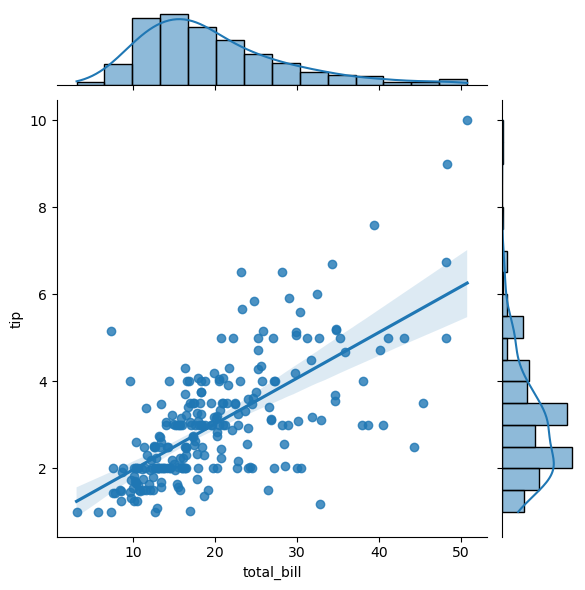

In [29]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')
plt.show()

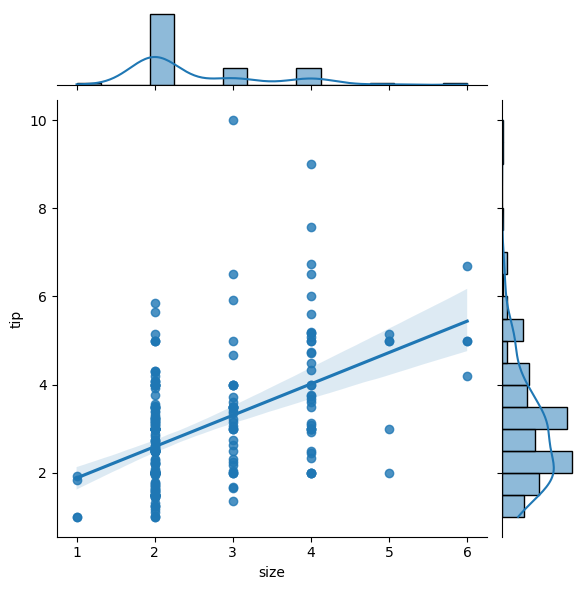

In [24]:
sns.jointplot(data = tips, x = 'size', y = 'tip', kind = 'reg')
plt.show()

## pairplot

pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns). 

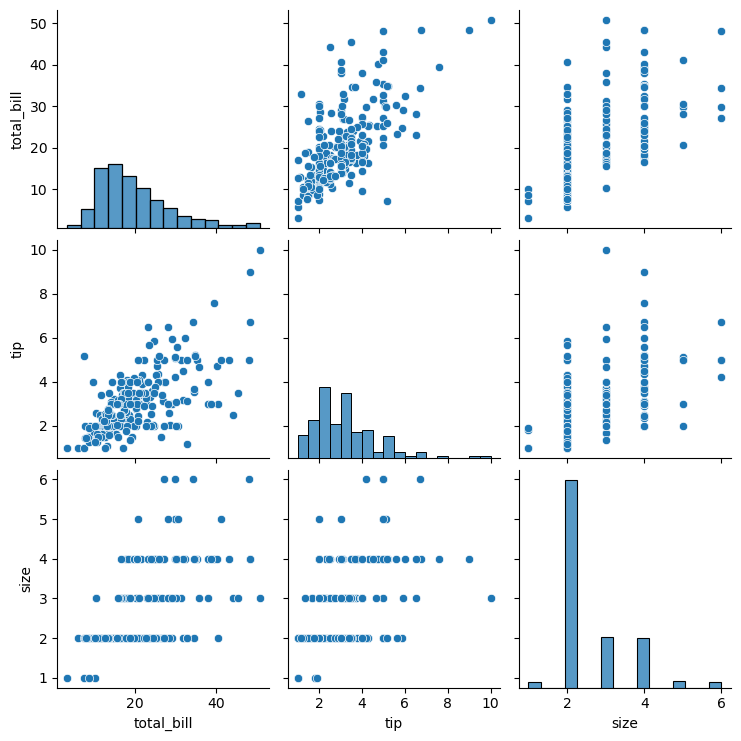

In [30]:
sns.pairplot(tips)
plt.show()

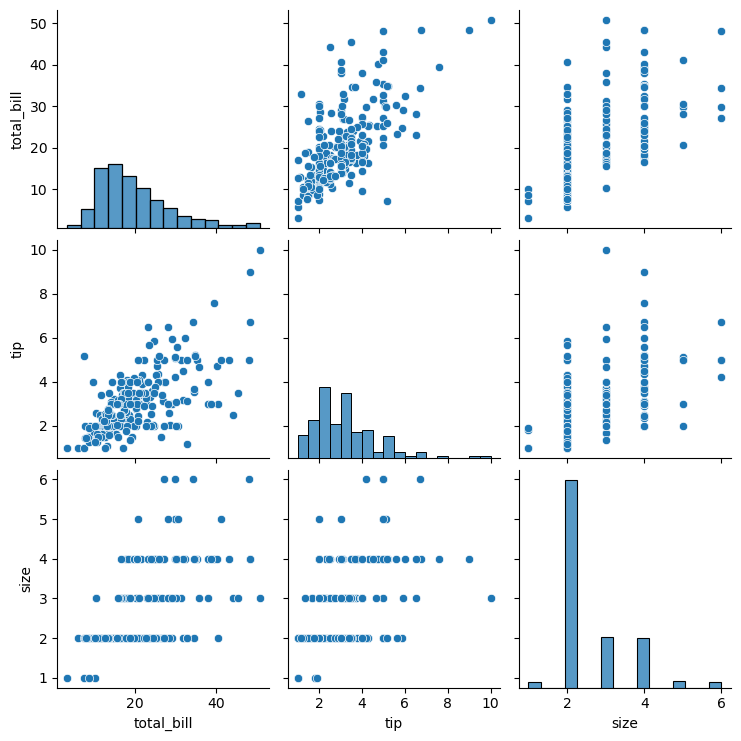

In [25]:
sns.pairplot(tips)
plt.show()

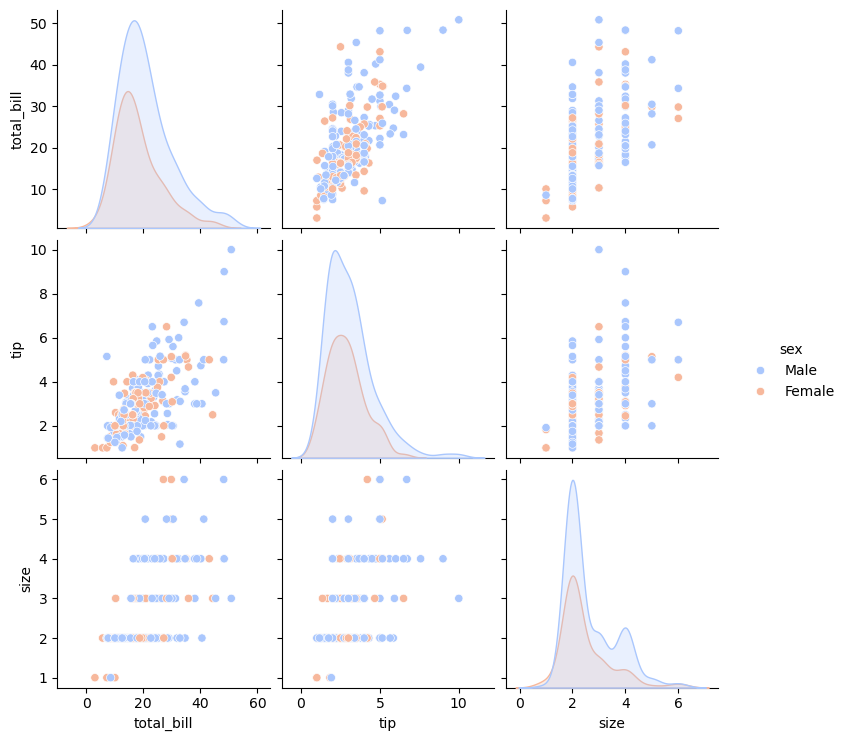

In [33]:
sns.pairplot(tips,hue='sex',palette='coolwarm')
plt.show()

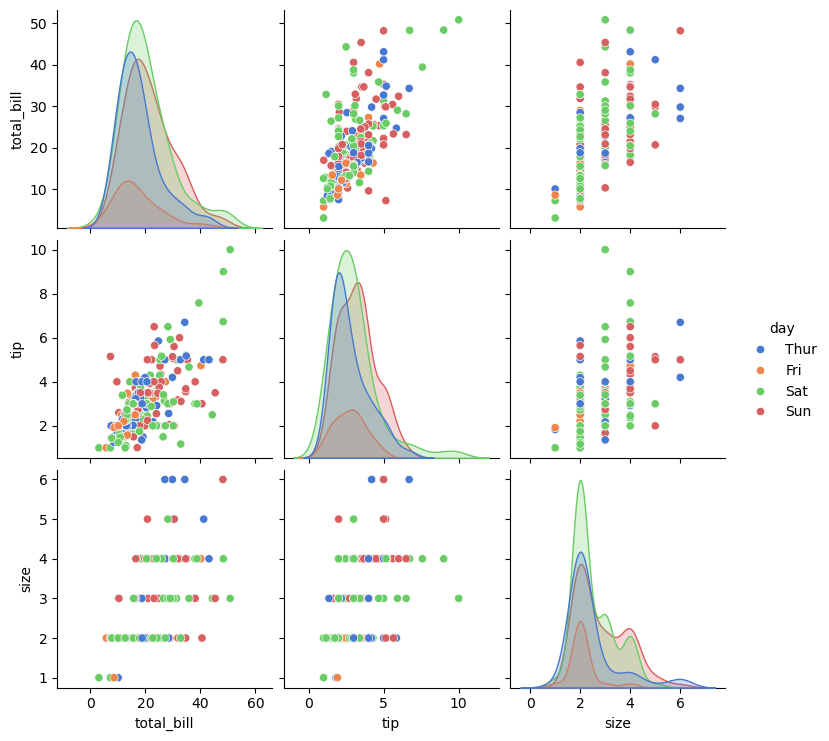

In [29]:
sns.pairplot(tips, hue = 'day', palette = 'muted')
plt.show()

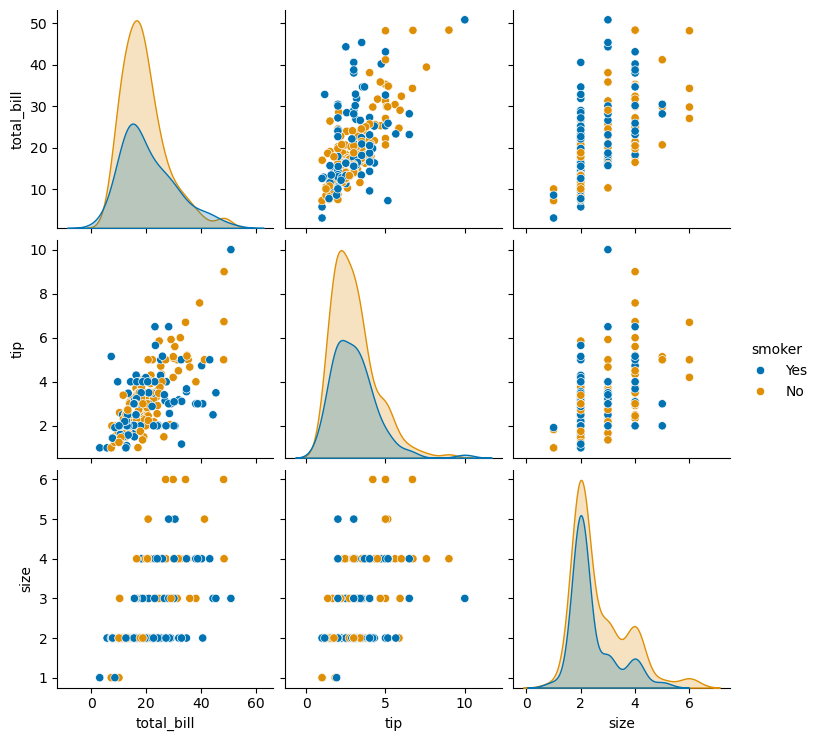

In [33]:
sns.pairplot(tips, hue = 'smoker', palette = 'colorblind')
plt.show()